# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

The label of this example is: 6


(-0.5, 31.5, 31.5, -0.5)

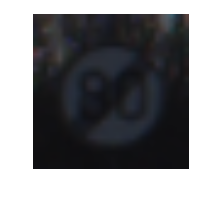

In [4]:
import random
import numpy as np

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print("The label of this example is:", y_train[index])
plt.axis('off')

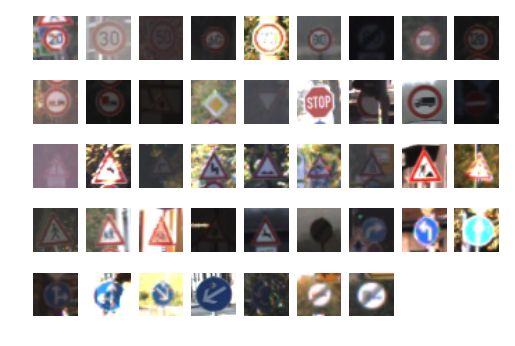

In [5]:
sign = []

for i in range(0,n_classes):
    plt.subplot(5,9,i+1)
    sign.append(X_train[np.where( y_train == i )[0][0],:,:,:].squeeze())
    img = plt.imshow(X_train[np.where(y_train == i)[0][0],:,:,:].squeeze())
    plt.axis('off')

Visualizing the distribution of labels
[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


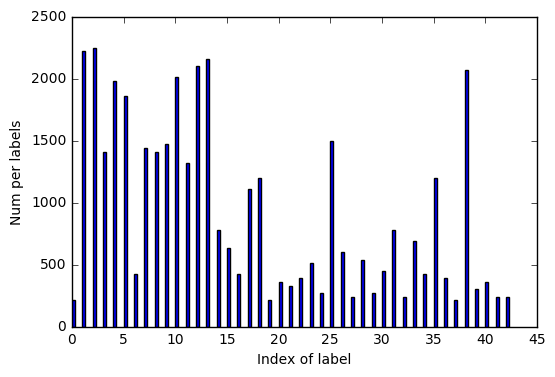

In [6]:
print("Visualizing the distribution of labels")

num_per_label = np.bincount(y_train)
print(num_per_label)
ind = np.arange(n_classes)
width = 0.3
plt.bar(ind, num_per_label, width, color='b')

plt.ylabel('Num per labels')
plt.xlabel('Index of label')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

max_count = max(num_per_label)
min_count = min(num_per_label)
print (max_count/min_count)

10.7142857143


An example of augmentated images


(-0.5, 31.5, 31.5, -0.5)

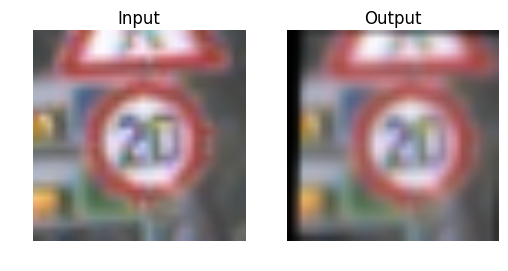

In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Randomly produce samples in position, scale and rotation

import cv2

def random_affine(x,tran,scale,deg, row_index=0, col_index=1):
    tran1 = np.random.uniform(tran[0],tran[1])
    tran2 = np.random.uniform(tran[0],tran[1])
    scale = np.random.uniform(scale[0],scale[1])
    deg = np.random.uniform(-deg,deg)
    
    rows, cols= x.shape[row_index], x.shape[col_index]
    
    #random translation
    tran_M = np.float32([[1,0,tran1],[0,1,tran2]])
    x = cv2.warpAffine(x, tran_M,(cols,rows))
    
    #random rotation & scaling
    rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
    x = cv2.warpAffine(x, rot_M,(cols,rows))
    return x

print("An example of augmentated images")
img = X_train[1]
dst = random_affine(img,[-2,2], [0.9,1.1], 15)
plt.subplot(121)
plt.imshow(img)
plt.title('Input')
plt.axis("off")
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
plt.axis("off")


### Second Submission
<p style="color:red;"> 1st change as follows</p>

- As suggested, I add and improve my augmentation function in another two levels: illumination and shearing, that I forgot considering in first submission.
- We can see from our original data, the brightness in dataset is various. So this is necessare to consider the effect from the illumination.  


In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import matplotlib.image as mpimg

In [10]:
# augment image of random illumination changes (hyperparam 0.25)
def augment_illumination(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    #print(random_bright)
    image[:,:,2] = image[:,:,2]*random_bright
    image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    return image

In [11]:
# Augment image wrt translation, rotation, shear
# In my old version code I didn't add shear transformation
def transform_image(img, ang_range, shear_range, trans_range):
    '''
    The function takes in following arguments
    1. image
    2. ang_range: range of rotation angle
    3. shear_range: range of values to apply affine transformation
    4. trans_range: range of values to apply translation
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows, cols, ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2, rows/2),ang_rot,1)
    
    # Translation
    tr_x = trans_range*np.random.uniform()
    tr_y = trans_range*np.random.uniform()
    Trans_M = np.float32([[1,0, tr_x], [0,1, tr_y]])
    
    #Shear --how to fix the point ???
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 =  5 + shear_range*np.random.uniform()-shear_range/2
    pt2 = 20 + shear_range *np.random.uniform()-shear_range/2
    
    pts2 = np.float32([[pt1,5],[pt2,pt1], [5,pt2]])
    shear_M = cv2.getAffineTransform(pts1, pts2)
    
    img = cv2.warpAffine(img, Rot_M, (cols, rows))
    img = cv2.warpAffine(img, Trans_M, (cols, rows))
    img = cv2.warpAffine(img, shear_M, (cols, rows))
    
    return img

An example to change illumination of original image
(32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

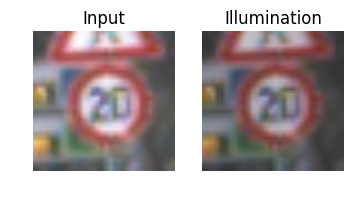

In [12]:
# Test an example

print("An example to change illumination of original image")
image_ex = X_train[1]
print(image_ex.shape)
dst = augment_illumination(image_ex)
plt.figure(figsize=(4,4))
plt.subplot(121)
plt.imshow(image_ex)
plt.title('Input')
plt.axis('off')

plt.subplot(122)
plt.imshow(dst)
plt.title('Illumination')
plt.axis('off')

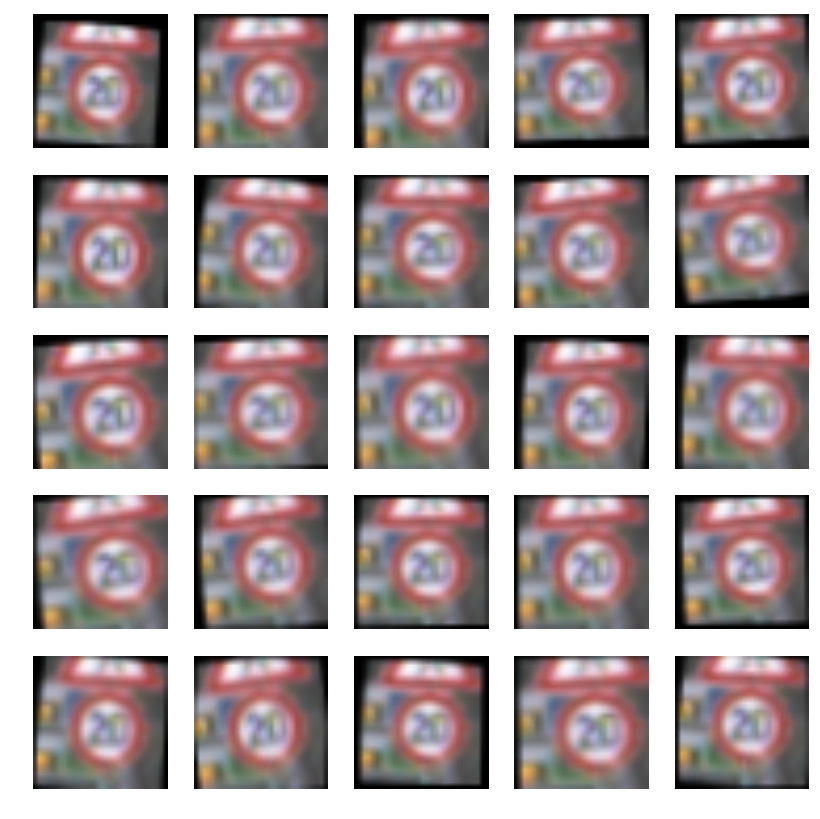

In [13]:
# Visualize a 100 random augmented image
gs1 = gridspec.GridSpec(5,5)
gs1.update(wspace = 0.01, hspace = 0.02)
plt.figure(figsize=(10,10))
for i in range(5*5):
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    img = transform_image(image_ex,15,2,2)
    
    plt.subplot(5,5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [14]:
# We apply 2 times augmentation, and every augmentation, we have augmented faked images
# by both transformation & illumination

iteration = 1

for time in range(iteration): 
    for i in range(n_classes):
        new_images = []
        new_labels = []
        mask = np.where(y_train == i)
        
        for img in X_train[mask]:
            new_images.append(transform_image(img,15,2,2))
            new_labels.append(i)
            new_images.append(augment_illumination(img))
            new_labels.append(i)
        X_train = np.append(X_train, np.asarray(new_images), axis=0)
        y_train = np.append(y_train, np.asarray(new_labels), axis=0)

In [15]:
# Normalize the image data with min_max scaling in scale [-0.5, 0.5]
#print(X_train.shape)

X_train = X_train/255.*1.0 -0.5
X_test = X_test/255.*1.0 -0.5

print('Mean:', np.mean(X_train))
print('Standard deviation:', np.std(X_train))
print('Mean_test:', np.mean(X_test))

Mean: -0.221388340408
Standard deviation: 0.24876900697
Mean_test: -0.177849175054


Visualizing the new distribution of labels
[ 630 6660 6750 4230 5940 5580 1260 4320 4230 4410 6030 3960 6300 6480 2340
 1890 1260 3330 3600  630 1080  990 1170 1530  810 4500 1800  720 1620  810
 1350 2340  720 2067 1260 3600 1170  630 6210  900 1080  720  720]


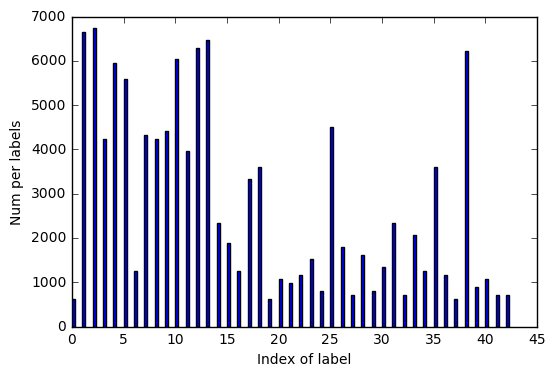

In [16]:
print("Visualizing the new distribution of labels")

num_per_label = np.bincount(y_train)
print(num_per_label)
ind = np.arange(n_classes)
width = 0.3
plt.bar(ind, num_per_label, width, color='b')

plt.ylabel('Num per labels')
plt.xlabel('Index of label')
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
- I normalize images by min_max scaling method in the range of [-0.5, 0.5]. The mean and variance show the result. The geometric interpretation is to center the cloud of data around the origin along every dimmension. I keep datasets in RGB format because some traffic signs have their own typical color representation and in my opinion the color information can help to train our classifier. 

- In the following model architechture, the one-hot encoding is also used to represent labels as vectors instead of numbers. This will reduce the side effect from label values.  

In [17]:
# Random dataset and split to training and validation dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size= 0.2,
    random_state= 0)

In [18]:
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
n_test = X_test.shape[0]

print("n_train:", n_train)
print("n_valid:", n_valid)
print("n_test:", n_test)

n_train: 94101
n_valid: 23526
n_test: 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

- My initial idea is to have a partition as 3:1:1 for training/validation/test dataset as a rule of thumb. 

- In the bar chart, it clearly shows the inbalanced distribution in every label. In this way, I just synthsize artifical images 3 times to all labels which are randomly perturbed in position ([-2,2] pixels),  in shear ([-2,2] ratio) and rotation ([-15,+15]  degrees). These parameters setting are stated in LeCun paper. I plot and verify the artifical images, they are reasonable jittered images. They are images well affined from the orginal one. In fact, an abundant dataset helps more than a sophisticated fine_tuning. 

In [19]:
import tensorflow as tf

# Set parameters
EPOCHS = 35
BATCH_SIZE = 150
KEEP_PROB = 0.5
RATE = 0.001
BETA = 0.001

In [20]:
# TF graph input
# x is a placeholder for a batch of input images
# y is a placeholder for a batch of output labels

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [21]:
# Create model

from tensorflow.contrib.layers import flatten

def Classifier(x):
    # Hyperparams
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional Input = 32*32*3, Output = 28*28*12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,12), mean= mu, stddev = sigma))
    conv1_B = tf.Variable(tf.zeros(12))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding ='VALID') + conv1_B
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling Input = 28*28*12 Output = 14*14*12
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Layer2: Convolutional  Output = 10*10*64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,12,64), mean = mu, stddev = sigma))
    conv2_B = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding='VALID') + conv2_B
    
    # Activation 
    conv2 = tf.nn.relu(conv2)
    
    # Pooling Input =10*10*64, Output=5*5*64
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten: Input = 5*5*64, Output = 1600
    fc0 = flatten(conv2)
    
    # Layer3 Fully Connected Input 1600, Output = 400
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600,400), mean=mu, stddev =sigma))
    fc1_B = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_B
    
    # Drop out
    fc1 = tf.nn.dropout(fc1, KEEP_PROB)
    
    # Layer4 Fully Connected Input 400, Output = 120
    fc2_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev =sigma))
    fc2_B = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_B
    
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # Drop out
    fc2 = tf.nn.dropout(fc2, KEEP_PROB)
    
    # Layer5 Fully Connected, Input=120, Output = 84
    fc3_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean= mu, stddev =sigma))
    fc3_B = tf.Variable(tf.zeros(84))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_B
    
    # Activation
    fc3 = tf.nn.relu(fc3)
    
    # Layer6  Fully Connected, Input=84, Output = 43
    fc4_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean= mu, stddev =sigma))
    fc4_B = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_B
    
    return [logits, fc1_W, fc1_B, fc2_W, fc2_B, fc3_W, fc3_B, fc4_W, fc4_B]

In [22]:
# Model output
logits, fc1_W, fc1_B, fc2_W, fc2_B, fc3_W, fc3_B, fc4_W, fc4_B= Classifier(x)

In [23]:
# Add L2 regularization

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)+\
                BETA * tf.nn.l2_loss(fc1_W) + \
                BETA * tf.nn.l2_loss(fc1_B) + \
                BETA * tf.nn.l2_loss(fc2_W) + \
                BETA * tf.nn.l2_loss(fc2_B) + \
                BETA * tf.nn.l2_loss(fc3_W) + \
                BETA * tf.nn.l2_loss(fc3_B) + \
                BETA * tf.nn.l2_loss(fc4_W) + \
                BETA * tf.nn.l2_loss(fc4_B)

# Operation lists

loss_operation = tf.reduce_mean(cross_entropy)
prediction_operation = tf.nn.softmax(logits)
optimizer= tf.train.AdamOptimizer(learning_rate = RATE).minimize(loss_operation)

# Evaludation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is similar to the LeNet5.

- **Input layer:** 75510 RGB images with size 32x32x3
- **Layer 1: ConvNet ** 32x32x3 => 28x28x12
- **Activation:** ReLu
- **Max pooling:** 28x28x12 => 14x14x12
- **Layer 2: ConvNet ** 14x14x12 => 10x10x64
- **Activation:** ReLu
- **Max pooling:**10x10x64 => 5x5x64
- **Flanten:**5x5x64 => 1600
- **Layer 3: Fully Connected** 1600 => 400
- **Activation:** ReLu
- **Dropout:** 0.5 keep
- **Layer 4: Fully Connected** 400 => 120
- **Activation:** ReLu
- **Dropout:** 0.5 keep
- **Layer 5: Fully Connected** 120 => 84
- **Activation:** ReLu
- **Layer 6: Fully Connected** 84 => 43
- **Logits:** logits of 43 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Adamoptimizer is used
- Batch size is 150
- Training epoch is 35
- Learning rate is 0.001
- Keep_prob is 0.5
- beta for L2: 0.0001
- As stated in udacity course, learning slower, learning deeper & early stopping. I chose these hyperparameters after trying several training epoches as [10,20,30,40,50,60,70], learning rate as [0.1, 0.01, 0.001] 

In [25]:
# Lauch the graph

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training
    
    print("Training ... ")
    num_examples = len(X_train)   
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'classifier')
    print("Model saved")

Training ... 
EPOCH 1 ...
Validation Accuracy = 0.863

EPOCH 2 ...
Validation Accuracy = 0.919

EPOCH 3 ...
Validation Accuracy = 0.939

EPOCH 4 ...
Validation Accuracy = 0.948

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.955

EPOCH 7 ...
Validation Accuracy = 0.957

EPOCH 8 ...
Validation Accuracy = 0.961

EPOCH 9 ...
Validation Accuracy = 0.963

EPOCH 10 ...
Validation Accuracy = 0.968

EPOCH 11 ...
Validation Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.964

EPOCH 13 ...
Validation Accuracy = 0.966

EPOCH 14 ...
Validation Accuracy = 0.971

EPOCH 15 ...
Validation Accuracy = 0.968

EPOCH 16 ...
Validation Accuracy = 0.971

EPOCH 17 ...
Validation Accuracy = 0.973

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.975

EPOCH 21 ...
Validation Accuracy = 0.970

EPOCH 22 ...
Validation Accuracy = 0.970

EPOCH 23 ...
Validation Accuracy = 0.976

EPOCH 24 ...
Validation Accur

In [26]:
# Restore model and Evaluate the test images

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('classifier.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.945


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In the proposed article, the authors used two layers to construct the convNet and moreover they combine their first layer as an input to the final fully connected layer as well, which motivates me a lot. Actually, the higher dimensional features(ex. shape of traffic sign) in dataset is not very complecate and distinct, two-layer is enough to get useful information. And to some degree, the lower layer is perhaps much useful to classifer to tell difference.


- Step1: I used the same code of LeNet-5 (2 layers + 2 fully connected layers) with a batch_size 150 and after 10 epochs, I get a validation accuracy of 0.96,but a test accuracy of 0.88. There is a big differece with two accuracy and the model is overfitted.

- Step2: I tried several epochs. Actually after around 35 epochs, no big changes happen to our validation accuracy in following 10 epochs. We would better stop ealiyer. So I choose 35 epochs.

- Step3: I found there is no techniques in LeNet5 to prevent the overfitting problem, so I think it will be useful if we adopt a L2 regularization and dropout in our layer.I chose dropout cause in lectures, I learnt dropout works better than L2. And the parmameters are obtained after trial and error as well.

- Step4. When I use keep_prob as 0.5, the valid accuracy decreased a lot so I change the depth of layer1 and layer2 to make sure the first fully connected layer can have more input neuros (change 400 to 890

- Step5. Just as I mentioned the shape of sign is not so complexe but some details of traffic sign matters a lot, so I add more fully connected layer to train the model for more information 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)


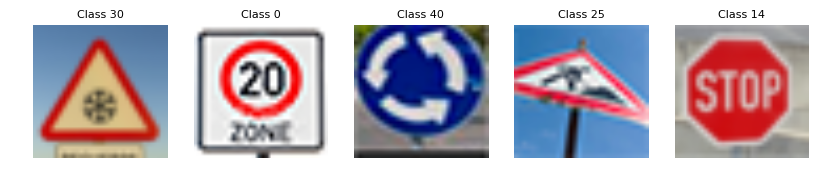

In [27]:
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import os

new_test = []

for name in os.listdir('newimg/'):
    img = misc.imread('newimg/'+ name)[:,:,:3]
    img = misc.imresize(img,(32,32))
    new_test.append(img)
    
    #img = np.asarray(mpimg.imread('newtest/'+ name))
    #img = cv2.resize(img, (32,32))
    #new_test.append(img)
    
new_test = np.asarray(new_test)

fig, axis = plt.subplots(1, 5, figsize=(10, 10))
test_labels = [30, 0, 40, 25, 14]

for i in range(0, len(new_test)):
    img = new_test[i]
    axis[i].imshow(img)
    axis[i].set_title("Class %d" % test_labels[i], fontsize=8)
    axis[i].axis("off")

print(new_test.shape)

#Normalize
new_test = new_test/ 255. * 1.0 -0.5

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

FIve images are downloaded from internet. According to the `signnames.csv`, the actual label index for them should be: [0, 5, 18, 25, 40]. Here None represents this traffic sign is not in german dataset.

After resizing as 32*32 format, there some important qualities:
- the resolution of most traffic sign decrease a lot
- the third and forth traffic sign have a big distortion, especially for the forth sign, it is very difficult to recognize.

In [28]:
# Restore model and Evaluate test images
import tensorflow as tf

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('classifier.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    predictions_label = tf.argmax(logits,1)
    labels = sess.run(predictions_label, feed_dict={x: new_test})
    print("Predicted labels:", labels)
    print()
    
    predictions_softmax = tf.nn.softmax(logits)
    softmax = sess.run(predictions_softmax, feed_dict={x: new_test})
    print("softmax: " , softmax)
    print()
    
    predictions_topk = tf.nn.top_k(softmax, k=4)
    topk = sess.run(predictions_topk,feed_dict={x: new_test})
    print("Top 4 predictions for every image:")
    print(topk)

Predicted labels: [30  0 38 33 14]

softmax:  [[  4.93755834e-14   2.08402468e-18   3.07590514e-24   5.35045745e-21
    1.82663876e-31   4.33790255e-17   3.59859491e-24   3.23307316e-19
    1.47699761e-14   1.69798218e-25   4.15512218e-25   1.24060267e-11
    2.44894137e-24   5.17141198e-24   1.22587202e-13   3.34531613e-23
    8.59453543e-23   3.00937920e-12   5.43166071e-16   4.75310336e-19
    4.25574228e-07   1.18300747e-12   2.10222100e-11   1.13159569e-11
    1.25751864e-09   1.17931567e-11   1.45241146e-13   2.71767791e-17
    6.95504127e-07   3.27623397e-01   6.72375500e-01   8.90712573e-11
    5.74562659e-24   1.38366043e-25   2.74207540e-18   1.48116291e-27
    6.69626940e-22   2.88687094e-22   5.50519577e-15   1.24121939e-24
    1.17265515e-24   4.65057071e-25   3.31668717e-31]
 [  9.99980211e-01   1.97582303e-05   2.03476190e-17   3.77609867e-25
    8.95462350e-12   1.03649594e-23   7.43974450e-20   1.02136881e-16
    4.55651517e-09   7.12536542e-29   0.00000000e+00   6.560

The examples of the label 38 & 33 are illustrated as follows:


(-0.5, 31.5, 31.5, -0.5)

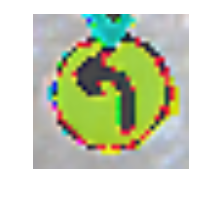

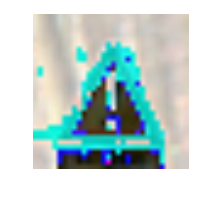

In [33]:
# The wrong recognized traffic sign:
import random
import numpy as np

print("The examples of the label 38 & 33 are illustrated as follows:")
im1 = X_train[38].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(im1)
plt.axis('off')

im2 = X_train[33].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(im2)
plt.axis('off')

### Second Submission
<p style="color:red;"> 2nd change as follows</p>

- As suggested, I compare the captured test with the result of test dataset, and propose some protential causes.
- I also visualize the softmax certainty to analyse the top 4 predictions.


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

- The accuracy for 5 new test images is 3/5 =60% 
3st and 4th sign are wrong recognized.
The 3nd one "roundabout sign" is recognized as "Turn right sign"
The 4th one "road work" is recognized as "Keep right way".

- Compared to the test result from the dataset(94.8%), as a result, I think my model did not perfom well in the real world situation. In fact, at the begining, I was afraid that the model would not well predict the  3rd and 4th captured image. According to the result, I think my model lack the following capabilities:

 _ 1. The model is not deep trained. As we known, if convNet is well trained, in the higher layer shows higher representation of feature maps such as shape, object, while in lower layer shows edges, lines, etc. As illustrated in 3nd captured images, my model well recognized "right turn direction" which is a component of roundabout sign, but lacks a big view of the whole picture. 

 _ 2. From the 4th test, we can see there is a big distortion of the captured image, the shape of "working man" is disturbed a lot. In the train/test dataset, there is no such kind of image. 
 
To conclude, I think my model should be trained much deeper, for example, adding one layer convNet again. Secondly, I think I should generate more jittered images in the view of distorsion in order to improve the ability to recognize image with big distorsion.


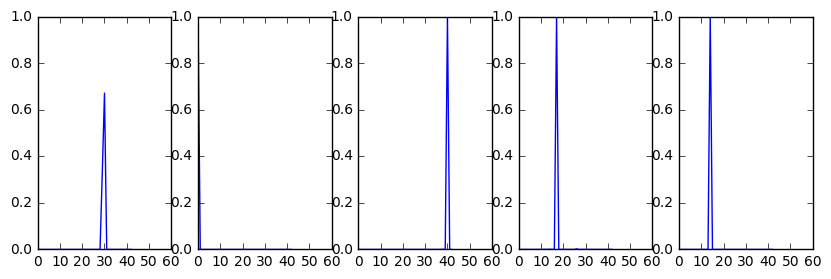

In [39]:
# Visualization of certainty within [0:1] problibility limit 

num, cols = softmax.shape

plt.figure(figsize=(10,3))
for i in range(0,num):
    plt.subplot(1,5,i+1)
    plt.plot(softmax[i])
    plt.xlim([0,60])
    plt.ylim([0,1])

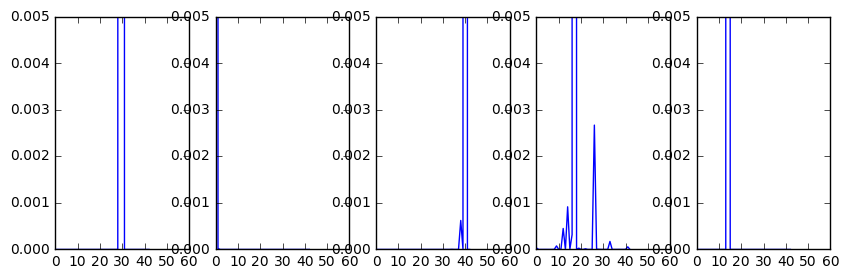

In [40]:
# Visualization of certainty within [0:0.005] problibility limit 

num, cols = softmax.shape

plt.figure(figsize=(10,3))
for i in range(0,num):
    plt.subplot(1,5,i+1)
    plt.plot(softmax[i])
    plt.xlim([0,60])
    plt.ylim([0,0.005])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
I plot the probability of softmax in two limit scale: one in [0,1], and the other in [0, 0.005].
According to these two figure:
- It is interesting that my model is very certain about all the prediction it made. This is caused by the inherence of my model.
- For the 1st, 2nd, 5th captured image, the predicted lable owns very high probability than others, however, the 3rd and 4th prediction have some other possible choice but in a very low probability. For the 3rd one, the second highlypredicted label is the true lable 38 according to the top4 caculation index. While for the 4th test, there is no true lable in the top4 index. I think my model is not trained deep enough to show a "object-level" feature map and it can be improved by adding a level of convNet again. Moreover, generating more artifical images with distorsion will also helps to enhance the real word sign predictions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.